<a href="https://www.kaggle.com/code/rasikagurav/twitter-sentiment-analysis?scriptVersionId=248453600" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes wit/h many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [2]:
train=pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
val=pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv')

In [3]:
print('Training Dataset:')
display(train.head())
print('Validation Dataset:')
display(val.head())

Training Dataset:


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Validation Dataset:


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [4]:
train.columns=['ID','entity','sentiment','tweet_content']

In [5]:
train.head()

,ID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
val.columns=['ID','entity','sentiment','tweet_content']

In [7]:
val.head()

,ID,entity,sentiment,tweet_content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             74681 non-null  int64 
 1   entity         74681 non-null  object
 2   sentiment      74681 non-null  object
 3   tweet_content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             999 non-null    int64 
 1   entity         999 non-null    object
 2   sentiment      999 non-null    object
 3   tweet_content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [10]:
print('Null values in training data:')
display(train.isnull().sum())
print('Null values in validation dataset:')
display(val.isnull().sum())

Null values in training data:


ID                 0
entity             0
sentiment          0
tweet_content    686
dtype: int64

Null values in validation dataset:


ID               0
entity           0
sentiment        0
tweet_content    0
dtype: int64

In [11]:
train=train.dropna()

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

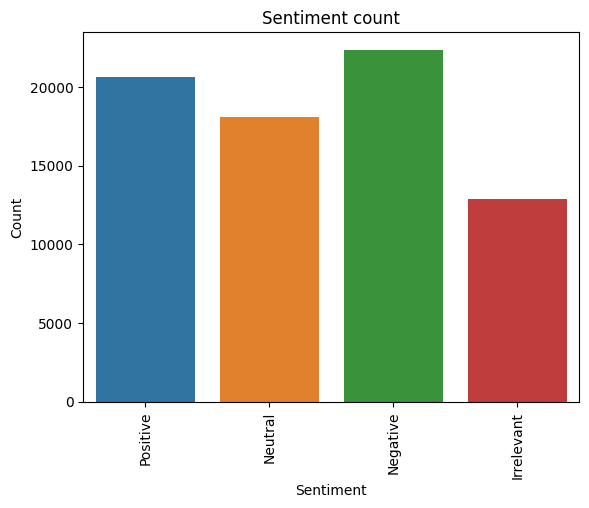

In [13]:
sns.countplot(data=train,x='sentiment')
plt.title('Sentiment count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [14]:
train=train.drop(['ID'],axis=1)
val=val.drop(['ID'],axis=1)

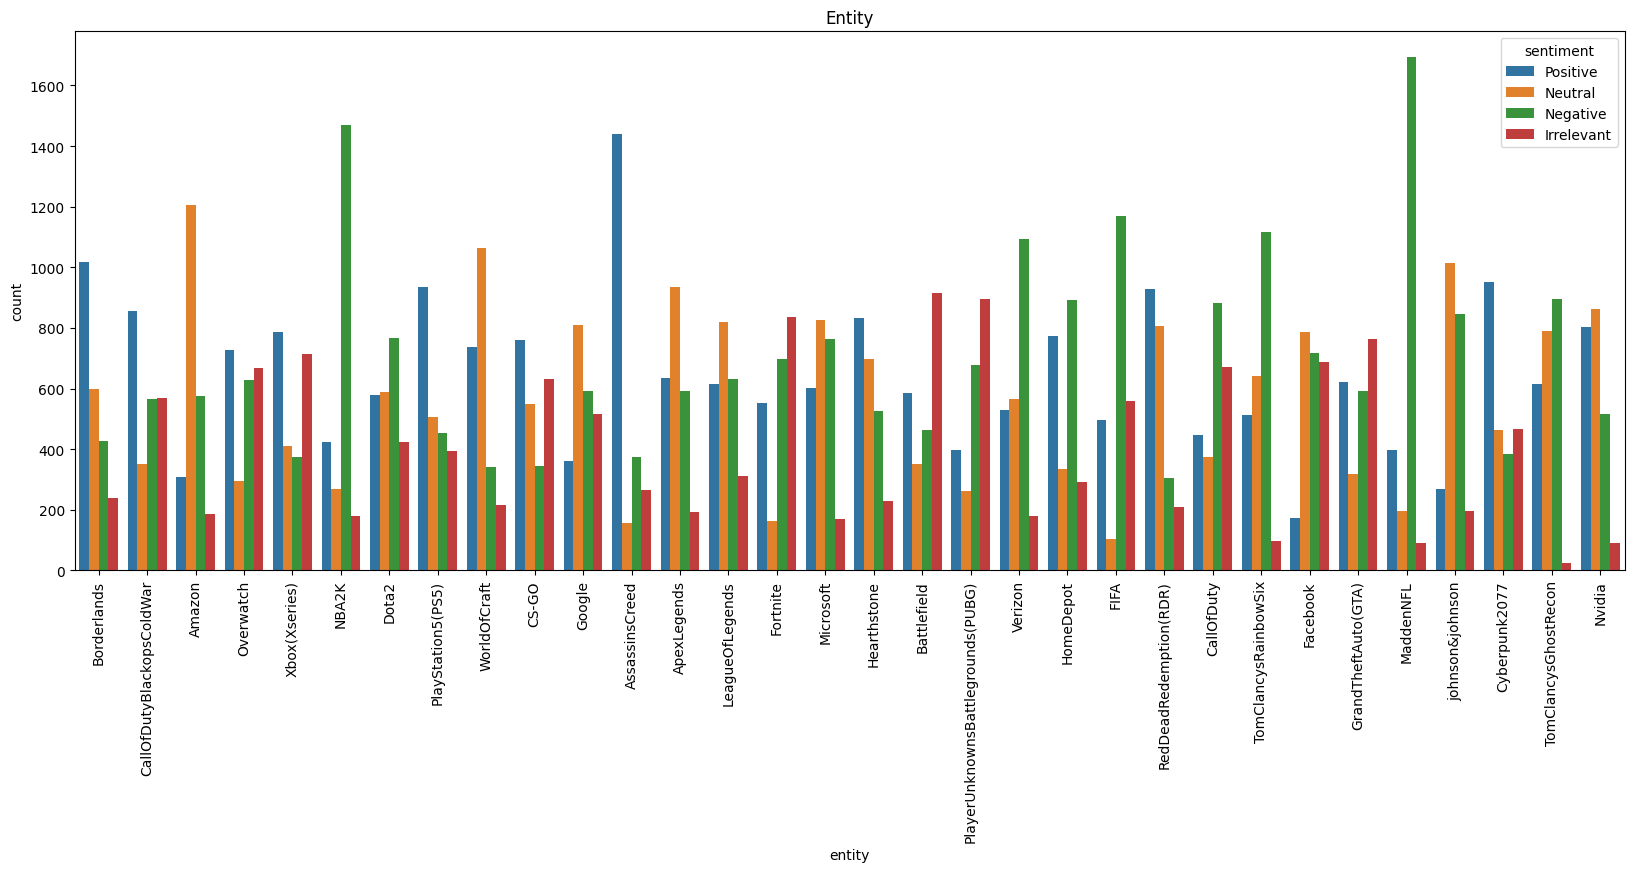

In [15]:
plt.figure(figsize=(20,7))
sns.countplot(data=train,x='entity',hue='sentiment')
plt.title('Entity')
plt.xlabel('entity')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [16]:
train=train.drop('entity',axis=1)
val=val.drop('entity',axis=1)

In [17]:
train.head(2)

,sentiment,tweet_content
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...


In [18]:
import re

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
def clean_df(text):
    # Removes url
    text=re.sub(r'http\S+|www.\S+','',text)
    #Removes mentions and hashtag
    text=re.sub(r'@\w+|#\w+','',text)
    #Removes Special characters and numbers
    text=re.sub(r'^a-zA-Z\s','',text)
    #Converts to lower
    text=text.lower()
    #Removes extra white space
    text=re.sub(r'\s+',' ',text).strip()
    #return text
    words=word_tokenize(text)
    lemmatize=WordNetLemmatizer()
    words=[lemmatize.lemmatize(word) for word in words]
    stopword=set(stopwords.words('english'))
    words=[word for word in words if word not in stopword]
    words=[word for word in words if len(word)>4]
    indices=np.unique(words,return_index=True)[1]
    clean_text=np.array(words)[np.sort(indices)].tolist()
    return clean_text





In [21]:
#X=train.drop('sentiment',axis=1)
#y=train['sentiment']

In [22]:
#texts=list(X['tweet_content'])
train_data=list(train['tweet_content'])
test_data=list(val['tweet_content'])

In [23]:
#text_clean=[clean_df(text) for text in texts]
train_clean=[clean_df(text) for text in train_data]
test_clean=[clean_df(text) for text in test_data]

In [24]:
#text_clean

In [25]:
#from sklearn.model_selection import train_test_split

In [26]:
#X_train,X_test,y_train,y_test=train_test_split(text_clean,y,test_size=0.2,random_state=0)

In [27]:
X_train=train_clean
X_test=test_clean


In [28]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
y_train=lr.fit_transform(train['sentiment'])
y_test=lr.transform(val['sentiment'])

In [29]:
#X_train

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-07-02 08:14:56.512090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751444096.971983      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751444097.077852      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [31]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx=tokenizer.word_index
sizevocab=len(word_idx)

In [32]:
sizevocab

31755

In [33]:
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)
X_train=pad_sequences(X_train,maxlen=150)
X_test=pad_sequences(X_test,maxlen=150)

In [34]:
#X_train

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [36]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
rf_predict=rf.predict(X_test)


In [37]:
cm=confusion_matrix(y_test,rf_predict)

In [38]:
cm

array([[154,   7,   2,   8],
       [  1, 236,   3,  26],
       [  1,  16, 257,  11],
       [  1,  15,   6, 255]])

In [39]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       171
           1       0.86      0.89      0.87       266
           2       0.96      0.90      0.93       285
           3       0.85      0.92      0.88       277

    accuracy                           0.90       999
   macro avg       0.91      0.90      0.91       999
weighted avg       0.91      0.90      0.90       999



In [40]:
accuracy=accuracy_score(y_test,rf_predict)

In [41]:
print('Accuracy of Random Forest is:',accuracy)

Accuracy of Random Forest is: 0.9029029029029029


In [42]:
#LSTM MODEL
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Input,Dense,GlobalMaxPooling1D,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
from tensorflow.keras.optimizers import Adam


In [43]:
max_len=150
input=Input(shape=(max_len,))
x=Embedding(sizevocab+1,100)(input)
x=Dropout(0.5)(x)
x=LSTM(150,return_sequences=True)(x)
x=Dropout(0.5)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(4,activation='softmax')(x)

model=Model(input,x)



optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

I0000 00:00:1751444132.286522      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751444132.287172      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [44]:
#from sklearn.preprocessing import LabelEncoder

In [45]:
#le=LabelEncoder()
#y_train_lr=le.fit_transform(y_train)
#y_test_lr=le.transform(y_test)

In [46]:
#X_train

In [47]:
import tensorflow as tf
num_classes=4
y_train_oh=tf.keras.utils.to_categorical(y_train,num_classes=num_classes)
y_test_oh=tf.keras.utils.to_categorical(y_test,num_classes=num_classes)

In [48]:
y_test_oh

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [49]:
history=model.fit(X_train,y_train_oh,epochs=15,validation_data=(X_test,y_test_oh))

Epoch 1/15


I0000 00:00:1751444138.737434      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


2313/2313 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.4392 - loss: 1.2147 - val_accuracy: 0.7978 - val_loss: 0.6297
Epoch 2/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.7359 - loss: 0.6946 - val_accuracy: 0.8659 - val_loss: 0.4039
Epoch 3/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8001 - loss: 0.5204 - val_accuracy: 0.8719 - val_loss: 0.3371
Epoch 4/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8274 - loss: 0.4448 - val_accuracy: 0.8959 - val_loss: 0.2859
Epoch 5/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8410 - loss: 0.4009 - val_accuracy: 0.8859 - val_loss: 0.3022
Epoch 6/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8510 - loss: 0.3696 - val_accuracy: 0.8939 - val_loss: 0.2764
Epoch 7/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8559 - loss: 0.3567 - val_accuracy: 0.8929 - val_loss: 0.2864
Epoch 8/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8614 - loss: 0.34

In [50]:
loss,accuracy=model.evaluate(X_test,y_test_oh)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9292 - loss: 0.2165


In [51]:
print('test loss:',loss)
print('test accuracy:',accuracy)

test loss: 0.2759160101413727
test accuracy: 0.9189189076423645
